In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500) # don't hide any columns with elipses

In [26]:
df = pd.read_csv('coaster_db.csv')

## Step 1: Understanding Data
- Shape (1087, 56)
- Head/Tail (to get a glance at the dataset)
- dtypes 
- Describe
- Columns (list all columns, see if a subset would be better to work with)

In [27]:
# how many rows/columns
df.shape

(1087, 56)

In [28]:
# show top 5 rows of dataset
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [29]:
# Descriptive statistics
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## Step 2: Preparation
- Drop irrelevant columns/rows


In [30]:
# Copied list from output of df.columns, and pasted here to identify a subset of the data set. This way makes it clear what columns were "dropped"". 

df = df[['coaster_name','Manufacturer','Location', 'Status','year_introduced',
         'Inversions_clean', 'Gforce_clean', 'latitude', 'longitude','opening_date_clean',
         'Type_Main','speed_mph', 'height_ft']].copy()

    # Discarded columns
     
    # 'Length', 'Speed','Opening date','Type','Height restriction', 'Model', 'Height','Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section','Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle', # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced', 'Track layout', 'Fastrack available', 'Soft # opening date.1', 'Closing date','Opened', 'Replaced by', 'Website', 'Flash Pass Available', 'Must transfer # from wheelchair', 'Theme', 'Single rider line available', 'Restraint Style', 'Flash Pass available', # 'Acceleration', 'Restraints', 'Name','speed1', 'speed2', 'speed1_value', 'speed1_unit','height_value',height_unit'
    
       

In [31]:
df.dtypes

coaster_name           object
Manufacturer           object
Location               object
Status                 object
year_introduced         int64
Inversions_clean        int64
Gforce_clean          float64
latitude              float64
longitude             float64
opening_date_clean     object
Type_Main              object
speed_mph             float64
height_ft             float64
dtype: object

In [32]:
# casting column to datetime (from 'object')
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [33]:
# Renaming columns
df = df.rename(columns={'coaster_name': 'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [34]:
df.isna().sum()

Coaster_Name         0
Manufacturer        59
Location             0
Status             213
Year_Introduced      0
Inversions           0
Gforce             725
latitude           275
longitude          275
Opening_Date       250
Type_Main            0
Speed_mph          150
Height_ft          916
dtype: int64

In [35]:
# Count instances of duplicates in 'Coaster_Name' column
df.duplicated(subset=['Coaster_Name']).sum()

97

In [36]:
# Checking an example of a duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

# Year_Introduced column is different. 
# Possibly due to rollercoaster closing then reopening



,Coaster_Name,Manufacturer,Location,Status,Year_Introduced,Inversions,Gforce,latitude,longitude,Opening_Date,Type_Main,Speed_mph,Height_ft
39,Crystal Beach Cyclone,Traver Engineering,Crystal Beach Park,Removed,1926,0,4.0,42.8617,-79.0598,1926-01-01,Wood,60.0,NaN
43,Crystal Beach Cyclone,Traver Engineering,Crystal Beach Park,Removed,1927,0,4.0,42.8617,-79.0598,1926-01-01,Wood,60.0,NaN


In [37]:
# Removing duplicates (if coaster has same name, location, opening date => only keep one row)
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening_Date'])] \
    .reset_index(drop=True)
df.shape

(990, 13)

## 3. Feature Understanding
Univariate Analysis (one variable) <br>
Plotting Feature Distributions

In [38]:
df.head()

,Coaster_Name,Manufacturer,Location,Status,Year_Introduced,Inversions,Gforce,latitude,longitude,Opening_Date,Type_Main,Speed_mph,Height_ft
0,Switchback Railway,LaMarcus Adna Thompson,Coney Island,Removed,1884,0,2.9,40.5740,-73.9780,1884-06-16,Wood,6.0,NaN
1,Flip Flap Railway,Lina Beecher,Sea Lion Park,Removed,1895,1,12.0,40.5780,-73.9790,1895-01-01,Wood,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,"Cleveland, Ohio, United States",Closed,1896,0,NaN,41.5800,-81.5700,NaT,Other,NaN,NaN
3,Loop the Loop (Coney Island),Edwin Prescott,Other,Removed,1901,1,NaN,40.5745,-73.9780,1901-01-01,Steel,NaN,NaN
4,Loop the Loop (Young's Pier),Edwin Prescott,Other,Removed,1901,1,NaN,39.3538,-74.4342,1901-01-01,Steel,NaN,NaN


In [39]:
# Rank by year how many rollercoasters were introduced (descending)
df.Year_Introduced.value_counts()




Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

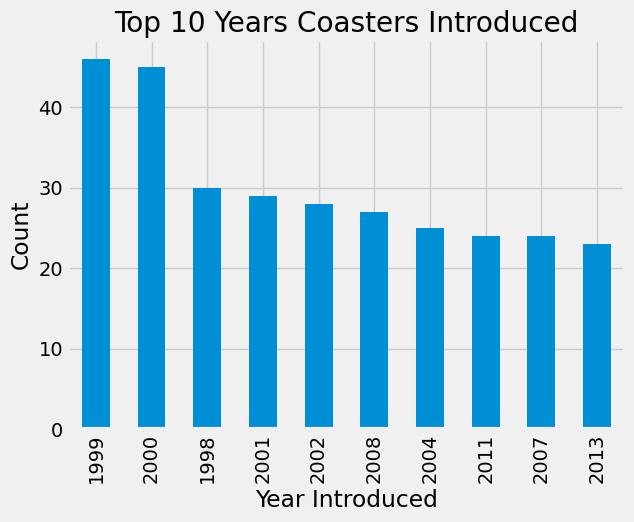

In [40]:
ax = df.Year_Introduced.value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')


Text(0.5, 0, 'Speed (MPH)')

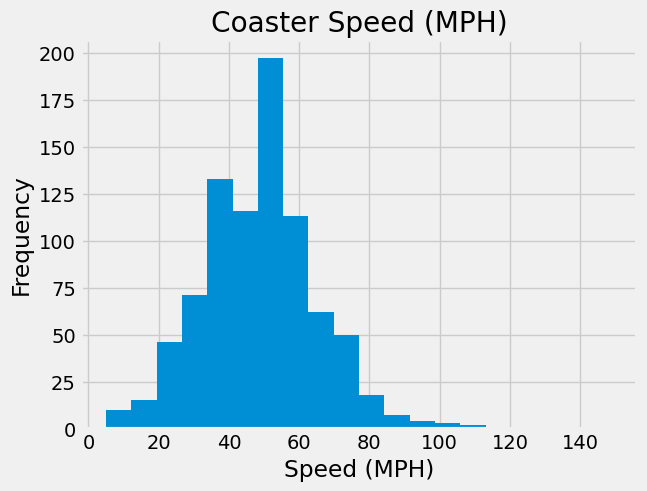

In [41]:
# Coaster Speed Distribution
ax = df['Speed_mph'].plot(kind="hist", 
                      title="Coaster Speed (MPH)", 
                      bins=20)
ax.set_xlabel('Speed (MPH)')

Text(0.5, 0, 'Speed (MPH)')

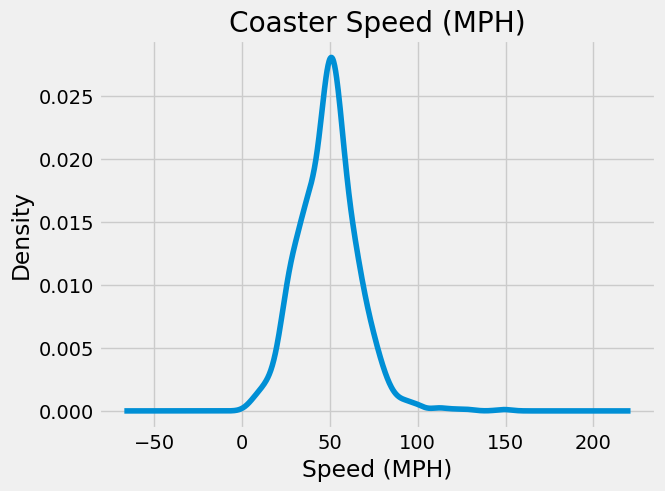

In [42]:
# 'Kernel Density Estimate' plot
# 
ax = df['Speed_mph'].plot(kind="kde", 
                      title="Coaster Speed (MPH)")
ax.set_xlabel('Speed (MPH)')

## 4. Feature Relationships
#### How do these attributes relate to each other?
ScatterPlot <br>
Heatmap 

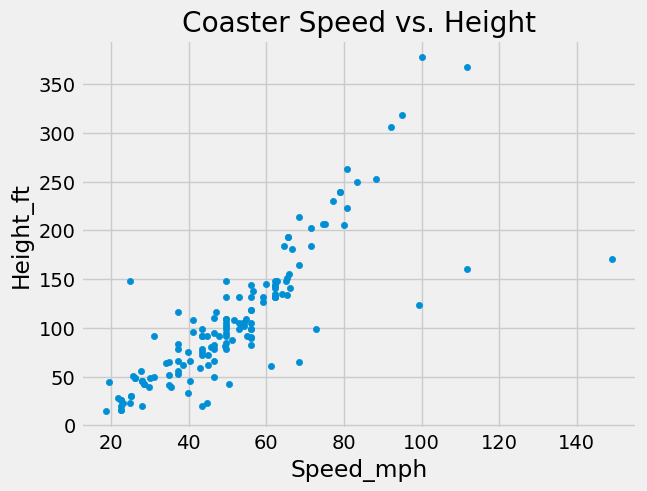

In [43]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

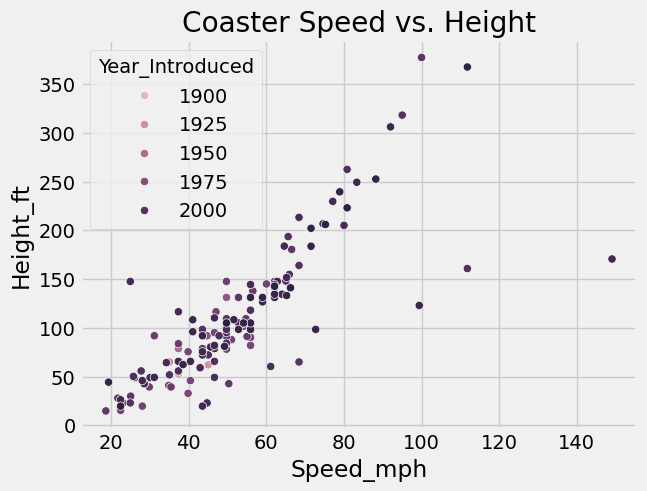

In [44]:
# using Seaborn to set the Hue of the data points to represent Year Introduced
ax = sns.scatterplot(
        x='Speed_mph',
        y='Height_ft',
        hue='Year_Introduced',
        data=df)
ax.title.set_text('Coaster Speed vs. Height')
plt.show()

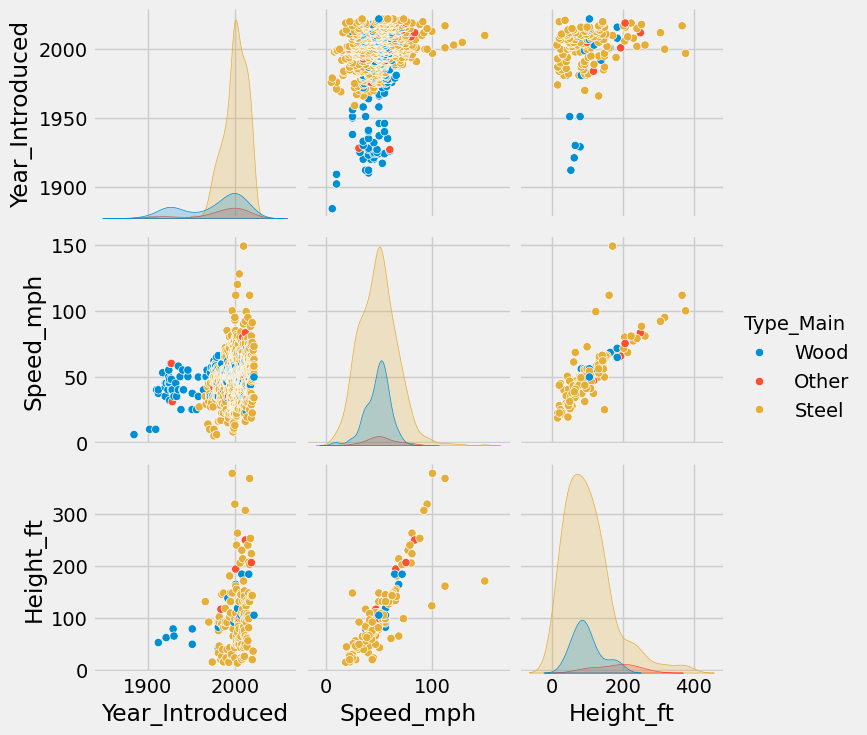

In [45]:
# Showing high-level view of relationships for quick analysis
sns.pairplot(
        data=df,
        vars=['Year_Introduced', 'Speed_mph', 'Height_ft'],
        hue="Type_Main"
)

In [46]:
# Correlation
# high correlation between Height and Speed of a rollercoaster
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

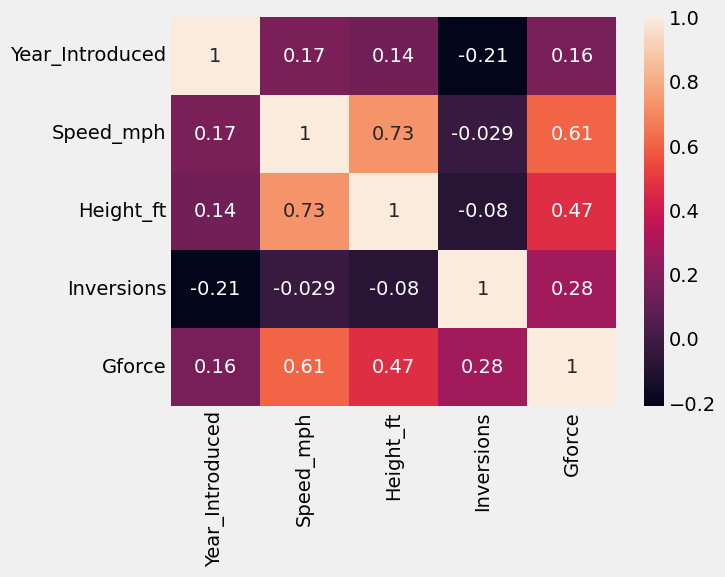

In [47]:
sns.heatmap(df_corr, annot=True) # annot puts correlations in the squares as labels

## 5. Asking Questions

Locations with fastest roller coasters?


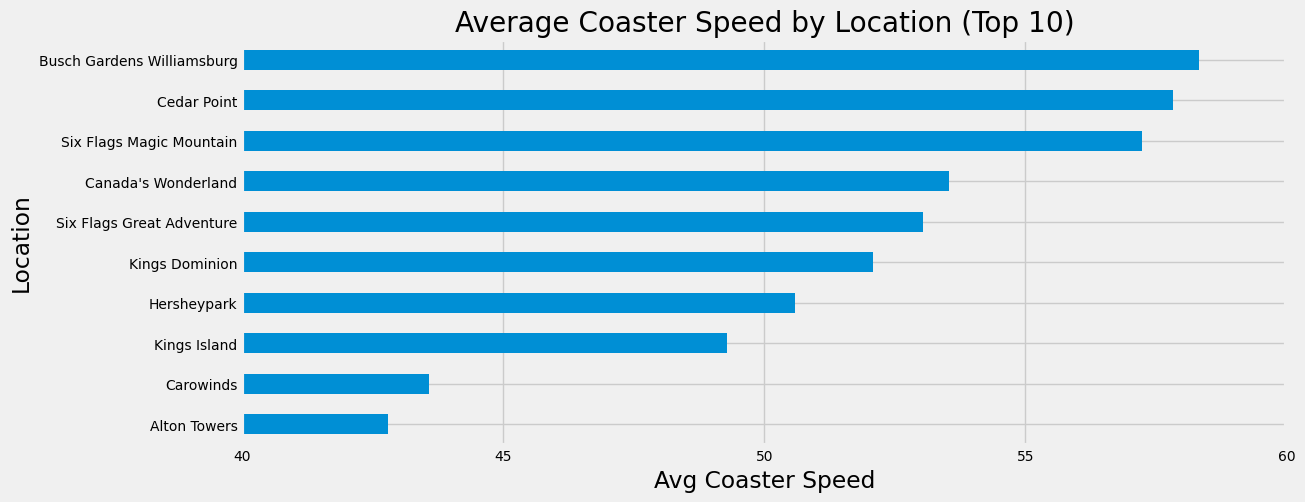

In [48]:
# Locations with > 10 coasters with highest avg speeds
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean', 'count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', 
          figsize=(12,5), 
          title='Average Coaster Speed by Location (Top 10)',
          xlim=(40, 60),
          xticks=range(40, 61, 5),
          fontsize=10)
ax.set_xlabel('Avg Coaster Speed')
plt.show()